## Solving $\frac{\delta \phi}{\delta t} = \frac{\delta}{\delta x}\left(k(\phi)\frac{\delta \phi}{\delta x}\right)$ with Dirichlet boundary coefficients

Defining $k(\phi)= k0 + k1\phi$

Representing $\phi$ as spline of order $k$: $\phi(x) = \sum_i{c_i(t)\cdot B^{(k)}_i(x)}$

now let : 
* $A_{ij}$- matrix contains the second order derivative in the collocation points $x_j$
* $A1_{ij}$- matrix contains the first order derivative in the collocation points $x_j$
* $B_{ij}$- matrix contains 0 order derivative in the collocation points $x_j$
* $c_i$- vector contain the coefficients/weights for the respecitve basic spline

Using expicit Euler to solve for time steps, such that 

$\phi(t+ \Delta t) = \phi(t) + \Delta t\cdot \partial_t\phi(t)$


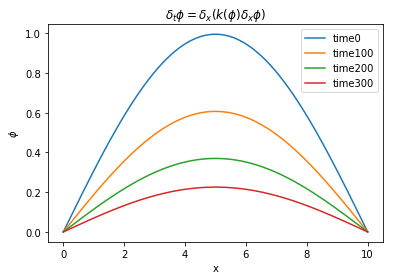

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.linalg as spl
from bspline import Bspline
from bspline.splinelab import aptknt

x     = np.linspace(0,10,10)   #space grid to solve for coefficients c
xfine = np.linspace(0,10,1000) #gird to plot
dt    = .05                    #timesteps
t     = np.arange(0,20,dt)     #timegrid 
order = 5                      #order of B-spline

knot_vector = aptknt(x, order)           #kreates knot points with Ghost points
basis       = Bspline(knot_vector,order) #Object of basic spline vectors: basis(0) gives 0´th basis spline

#==================Creating 4 Splines: A,A1,B,C ==================================

C = basis.collmat(xfine) #spline to plot/evaluate solution once coefficients c are obtained
C[-1,-1] = 1             #sets the bottom right point to 1 instead of 0

B = basis.collmat(x) #creates the Matrix Bij
B[-1,-1] = 1         #Bottom right point to 1 instead of 0 to avoid singular matrix
Binv = spl.inv(B)    

A  = basis.collmat(x,deriv_order=2) #creates Matrix Aij; 2n order derivative of splines 

A1 = basis.collmat(x,deriv_order=1) #creates Matrix A1ij; 1n order derivative of splines

#================= initial coefficients =======================================
c = np.dot(Binv,np.sin(np.pi/x[-1]*x)) #starting vector for c 

bc = np.zeros(np.size(B,0)); bc[0] = 0; bc[-1] = 0 #LHS & RHS Dirichlet boundary conditions

k0 = 1; k1 = 0.5 #koefficents of k(phi) = k0 +k1*phi

#seting up delta_t phi
dphi = dt*(k0*np.dot(A,c) + k1*np.dot(np.diag(np.dot(B,c),k=0),np.dot(A,c)) + k1*np.dot(A1,c)**2)
dphi[0]  = 0; dphi[-1]  = 0 #including boundary conditions
Bstar    = np.copy(B)
Bstar[0] = 0; Bstar[-1] = 0

phi = np.zeros((len(t),len(xfine)))
for i in range(len(t)):
    interphi = np.dot(Bstar,c) + dphi + bc 
    c        = np.dot(Binv,interphi)
    dphi = dt*(k0*np.dot(A,c) + k1*np.dot(np.diag(np.dot(B,c),k=0),np.dot(A,c)) + k1*np.dot(A1,c)**2)
    phi[i]   = np.dot(C,c)
    if i%100 == 0: 
        plt.plot(xfine,phi[i],label = 'time'+str(i))
plt.xlabel('x')
plt.ylabel(r'$\phi$')
plt.title(r'$ $\frac{\delta \phi}{\delta t} = \frac{\delta}{\delta x}\left(k(\phi)\frac{\delta \phi}{\delta x}\right)$')
plt.legend(loc='best')
plt.show()

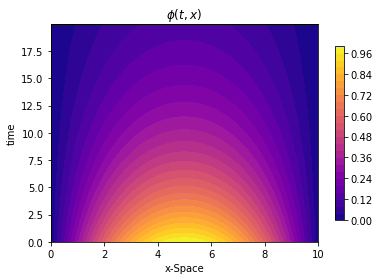

In [7]:
plt.contourf(xfine,t,phi,30,cmap = 'plasma')
plt.colorbar( orientation='vertical', shrink=0.8)
plt.xlabel('x-Space')
plt.ylabel('time')
plt.title(r'$\phi(t,x)$')
plt.show()
    